<a href="https://colab.research.google.com/github/mattzhang80/Barefoot-Rover/blob/main/MNIST_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/3
469/469 [==============================] - 14s 27ms/step - loss: 0.3154 - accuracy: 0.9037
Epoch 2/3
469/469 [==============================] - 8s 16ms/step - loss: 0.1561 - accuracy: 0.9531
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0649 - accuracy: 0.9803
Accuracy: 98.03

TEST DATASET RESULTS:
313/313 [==============================] - 1s 3ms/step
Example: 616


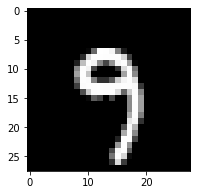

=> 9 (expected 9)

Example: 9959


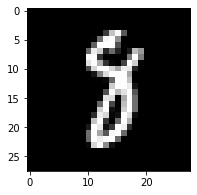

=> 8 (expected 8)

Example: 4968


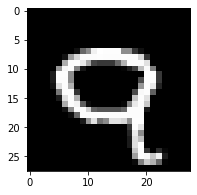

=> 9 (expected 9)

Example: 6005


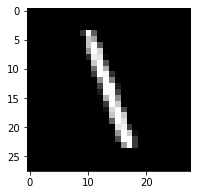

=> 1 (expected 1)

Example: 619


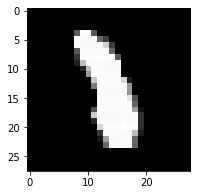

=> 0 (expected 1)

Example: 7574


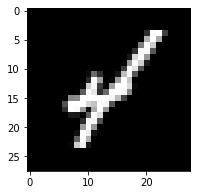

=> 4 (expected 4)

Example: 5827


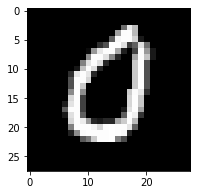

=> 0 (expected 0)

Example: 9235


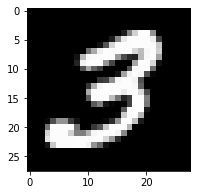

=> 3 (expected 3)

Example: 3776


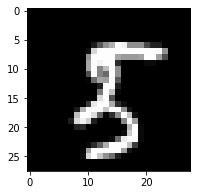

=> 8 (expected 5)

Example: 5152


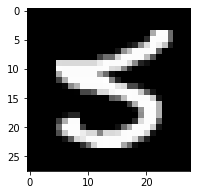

=> 5 (expected 5)

Example: 3270


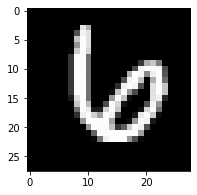

=> 6 (expected 6)

Example: 9930


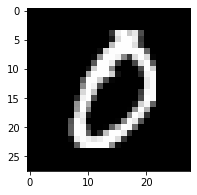

=> 0 (expected 0)

Example: 906


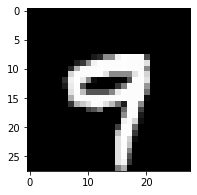

=> 9 (expected 9)

Example: 3261


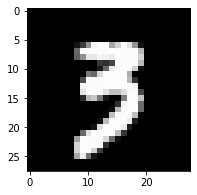

=> 3 (expected 3)

Example: 1743


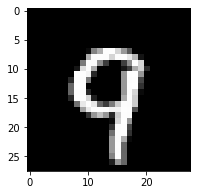

=> 9 (expected 9)

Example: 315


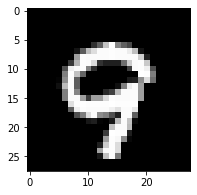

=> 9 (expected 9)

Example: 4467


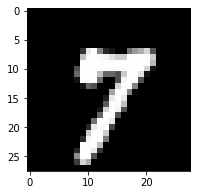

=> 7 (expected 7)

Example: 321


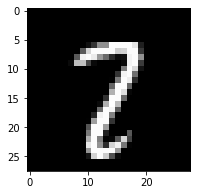

=> 7 (expected 2)

Example: 2289


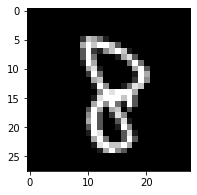

=> 8 (expected 8)

Example: 6582


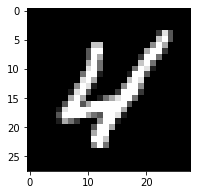

=> 4 (expected 4)

Example: 2589


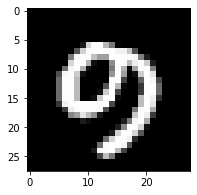

=> 9 (expected 9)

Example: 7344


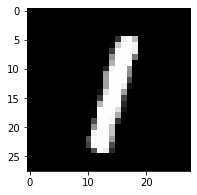

=> 1 (expected 1)

Example: 2675


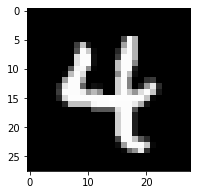

=> 4 (expected 4)

Example: 751


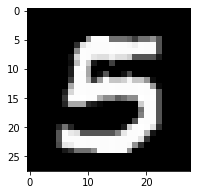

=> 5 (expected 5)

Example: 7363


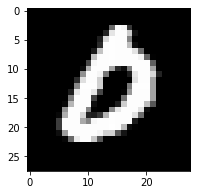

=> 0 (expected 0)



In [ ]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt

rows = 28
cols = 28
classes = 10

def data_summary(trainX, trainY, testX, testY):
  print('\nTrain images shape:', trainX.shape)
  print('Train labels shape:', trainY.shape)
  print('Test images shape:', testX.shape)
  print('Test labels shape:', testY.shape)
  print('Train labels:\n', trainY)
  print('Test labels:\n', testY)

(trainX, trainY), (testX, testY) = mnist.load_data()

#data_summary(trainX, trainY, testX, testY)

trainX = trainX.reshape((trainX.shape[0], rows * cols))
trainX = trainX.astype('float32') / 255
testX = testX.reshape((testX.shape[0], rows * cols))
testX = testX.astype('float32') / 255

trainY = to_categorical(trainY, classes)
testY = to_categorical(testY, classes)

#data_summary(trainX, trainY, testX, testY)

model = Sequential()
model.add(Dense(512, input_dim = (rows * cols), activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(trainX, trainY, epochs = 3, batch_size = 128)

_, accuracy = model.evaluate(trainX, trainY)
print('Accuracy: %.2f' % (accuracy * 100))

print('\nTEST DATASET RESULTS:')
predictions = (model.predict(testX) > 0.5).astype(int)
plt.rcParams['figure.figsize'] = (3, 3)

for i in range(25):
  rNUM = random.randrange(0, len(testX))
  plt.imshow(testX[rNUM].reshape(28, 28), cmap='gray', interpolation='none')
  print('Example:', rNUM)
  plt.show()
  print('=> %d (expected %d)\n' % (np.argmax(predictions[rNUM]), np.argmax(testY[rNUM])))